In [643]:
#Data Preprocessing and Handling
import pandas as pd
import numpy as np
#EDA / Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Model Training
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report
import statsmodels.api as sm
import scipy.stats as stats


In [644]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [645]:
data.shape

(773, 9)

In [646]:
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(i,data[i].unique())

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [647]:
for i in variables:
    c = 0
    for x in (data[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 505


Problem :- Some Features can't be 0 :: Glucose , BP , Skin Thickness , BMI , Insulin

Solution :- Replacing zeros with Mean/Median

In [648]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  print(f"{col} Median:{data[col].median()} Mean:{data[col].mean()}")

Glucose Median:117.0 Mean:120.88874514877102
BloodPressure Median:72.0 Mean:69.11125485122898
SkinThickness Median:23.0 Mean:20.532988357050453
Insulin Median:36.0 Mean:79.80077619663648
BMI Median:32.0 Mean:31.947347994825353


Impute Insulin with Median as it is having huge number of Outliers as the difference between mean and median is very large, and remaining will be imputed with mean.

In [649]:
invalid_zero = ['Glucose','Insulin','BMI','SkinThickness','BloodPressure']

for col in invalid_zero:
  data[col] = data[col].replace(0,np.nan)

In [650]:
replace_mean = ['Glucose','BMI','SkinThickness','BloodPressure']
for i in replace_mean:
  data[i].fillna(data[i].mean(),inplace=True)

data['Insulin'].fillna(data['Insulin'].median(),inplace=True)

/tmp/ipython-input-3139619621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mean(),inplace=True)
/tmp/ipython-input-3139619621.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               773 non-null    int64  
 1   Glucose                   773 non-null    float64
 2   BloodPressure             773 non-null    float64
 3   SkinThickness             773 non-null    float64
 4   Insulin                   773 non-null    float64
 5   BMI                       773 non-null    float64
 6   DiabetesPedigreeFunction  773 non-null    float64
 7   Age                       773 non-null    int64  
 8   Outcome                   773 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.5 KB


In [652]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.00000,773.000000,773.000000,773.000000
mean,3.833118,121.675781,72.388889,29.069597,140.279431,32.40853,0.472058,33.219922,0.346701
std,3.361908,30.337528,12.058654,8.793055,86.240308,6.87891,0.330262,11.724969,0.476228
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,120.000000,27.50000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.069597,125.000000,32.40000,0.376000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.50000,0.624000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [653]:
for i in variables:
    c = 0
    for x in (data[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 505


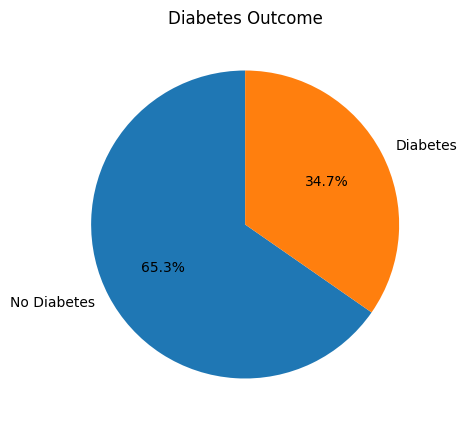

In [654]:
plt.figure(figsize=(5,5))
plt.pie(data['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


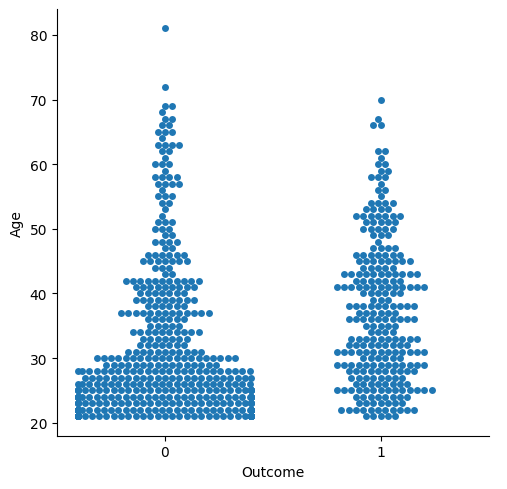

In [655]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=data)

From the graph, it is quite clear that most patients are adults aged 20–30 years. Patients in the age range 40–55 years are more prone to diabetes, as compared to other age groups. Since the number of adults in the age group 20–30 years is greater, the number of patients with diabetes is also more as compared to other age groups.

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

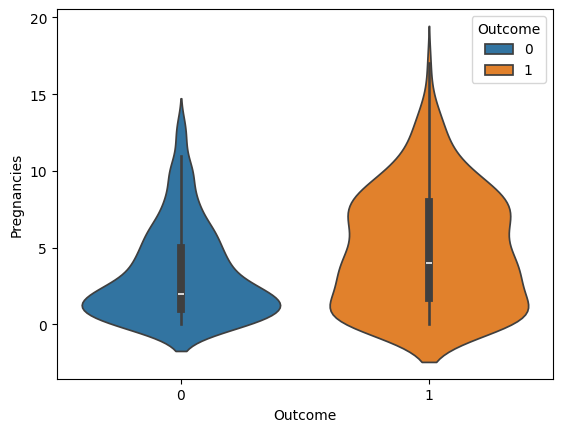

In [656]:
sns.violinplot(x='Outcome',y='Pregnancies',hue='Outcome',data=data)

The violin plot show a relationship between the number of pregnancies and diabetes. According to the graphs, the increased number of pregnancies highlights an increased risk of diabetes.

Text(0.5, 1.0, 'Glucose vs Diabetes')

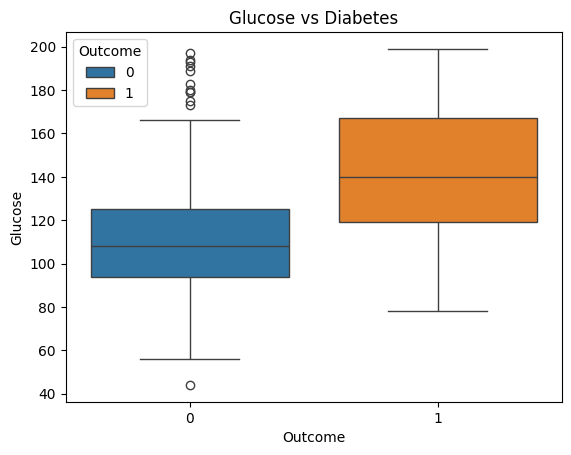

In [657]:
sns.boxplot(x='Outcome', y='Glucose', data=data,hue='Outcome').set_title('Glucose vs Diabetes')

Glucose level plays a significant role in determining whether the patient has diabetes. Patients with a median glucose level of less than 120 are more likely to be nondiabetic. Patients with a median glucose level greater than 140 are more likely to be diabetic. Therefore, high glucose levels are a good indicator of diabetes.



Text(0.5, 1.0, 'BloodPressure vs Diabetes')

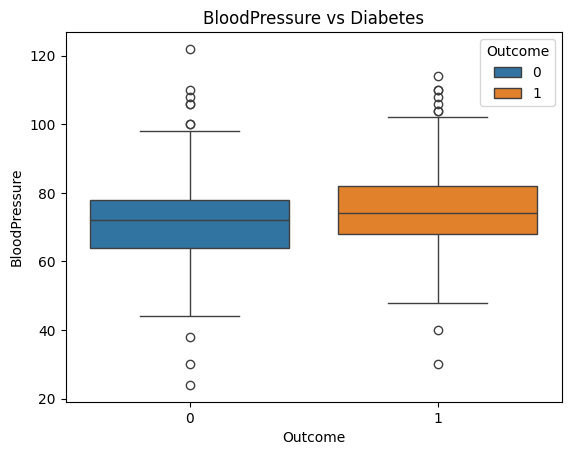

In [658]:
sns.boxplot(x='Outcome', y='BloodPressure', data=data,hue='Outcome').set_title('BloodPressure vs Diabetes')


Both the boxplot provide a clear understanding of the relationship between blood pressure and diabetes. The boxplot shows that the median blood pressure for diabetic patients is slightly higher than nondiabetic patients. The violin plot shows that the distribution of blood pressure for diabetic patients is slightly higher than for nondiabetic patients. However, there has not been enough evidence to conclude that blood pressure is a good predictor of diabetes.

**Will Remove BloodPressure**


Text(0.5, 1.0, 'SkinThickness vs Diabetes')

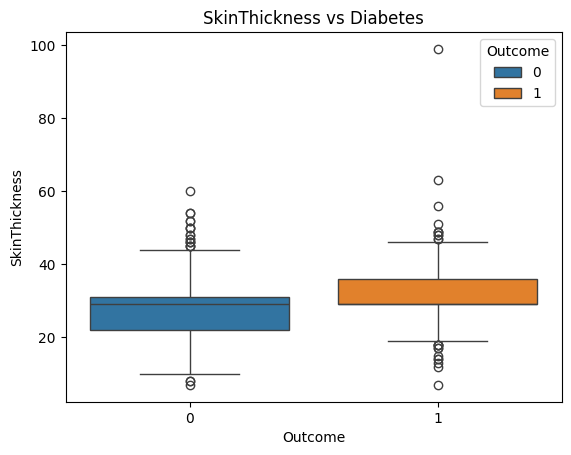

In [659]:
sns.boxplot(x='Outcome', y='SkinThickness', data=data,hue='Outcome').set_title('SkinThickness vs Diabetes')

Text(0.5, 1.0, 'Insulin vs Diabetes')

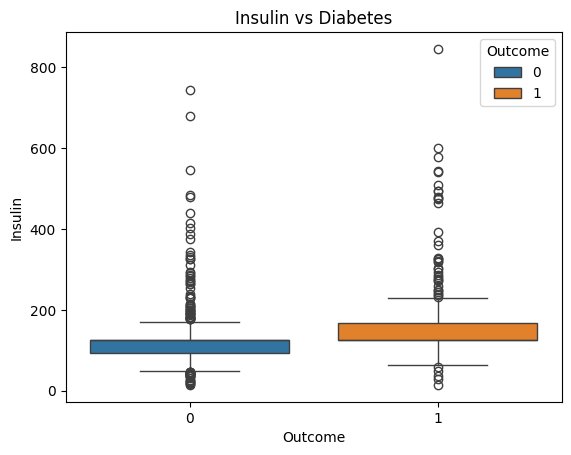

In [660]:
sns.boxplot(x='Outcome',y='Insulin',data=data,hue='Outcome').set_title('Insulin vs Diabetes')

the boxplot show the distribution of insulin levels in patients. In nondiabetic patients, the insulin level is near 100, whereas in diabetic patients, the insulin level is near 200. In the violin plot, we can see that the distribution of insulin levels in nondiabetic patients is more spread out near 100, whereas, in diabetic patients, the distribution is contracted and shows a little spread in higher insulin levels. This indicates that the insulin level is a good indicator of diabetes.

<Axes: xlabel='Outcome', ylabel='BMI'>

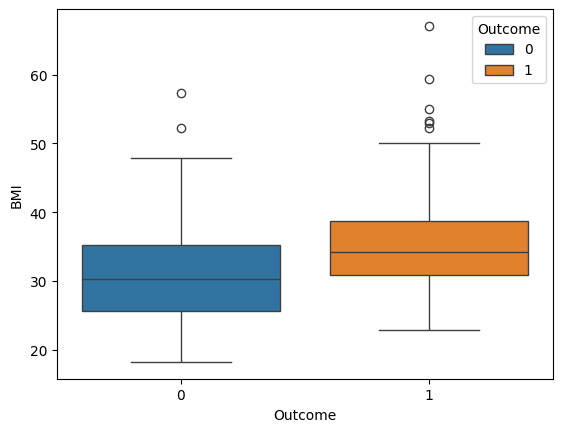

In [661]:
sns.boxplot(x='Outcome',y='BMI',data=data,hue='Outcome')

Nondiabetic patients have a normal BMI within the range of 25–35, whereas diabetic patients have a BMI greater than 35.

Text(0.5, 1.0, 'Diabetes Pedigree Function')

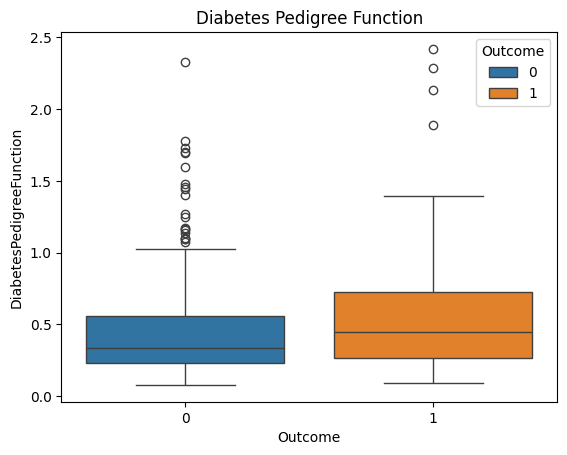

In [662]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=data,hue='Outcome').set_title('Diabetes Pedigree Function')

 The boxplot shows that patients with lower DPF are much less likely to have diabetes. The patients with higher DPF are much more likely to have diabetes.

Text(0.5, 1.0, 'Correlation Heatmap')

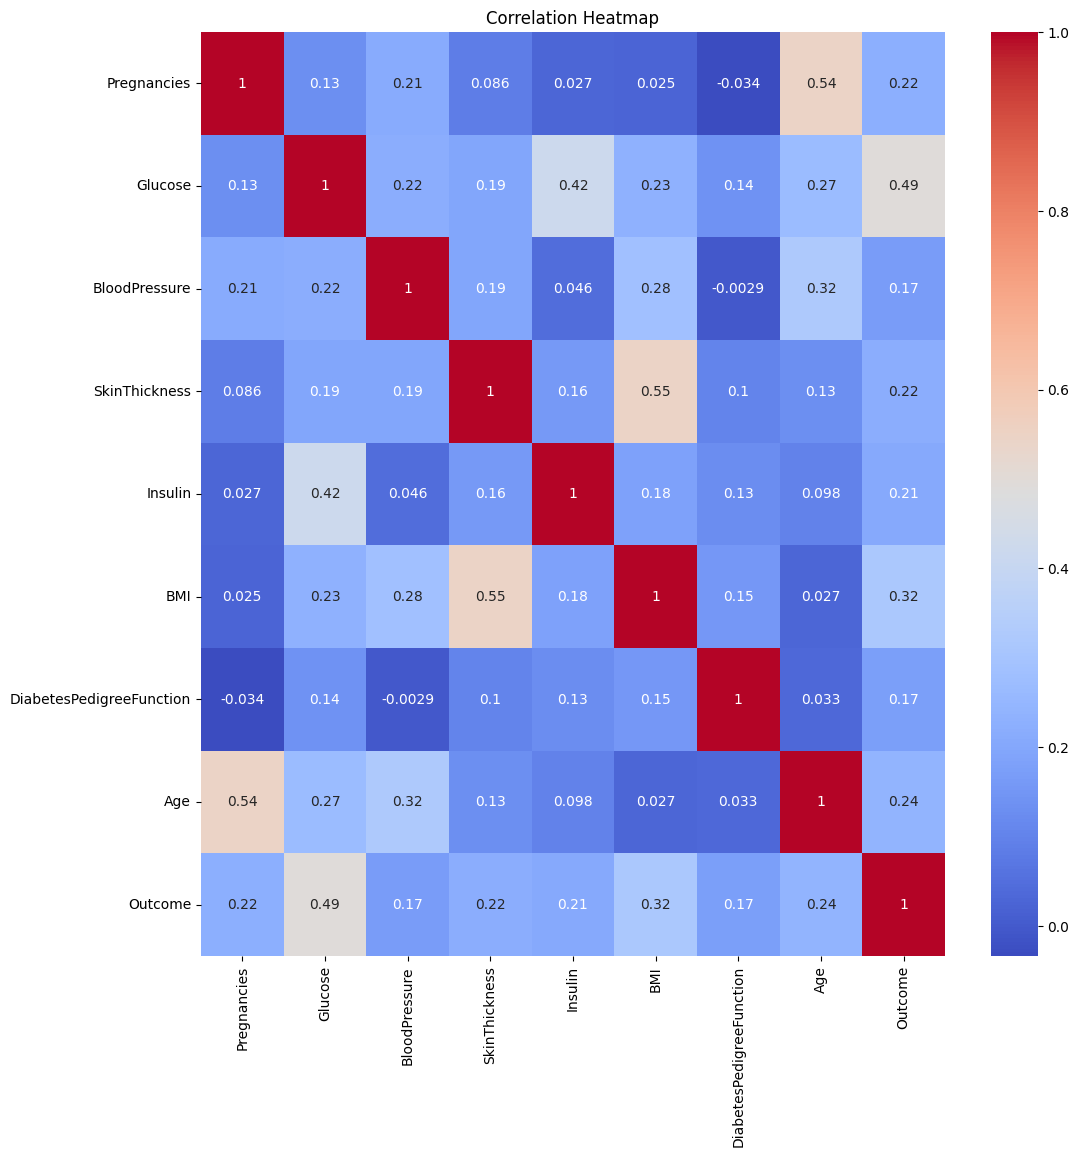

In [663]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm').set_title('Correlation Heatmap')

In [664]:
# Will Not Consider BloodPressure
x = data.drop(columns=['Outcome','BloodPressure'],axis=1)
y = data['Outcome']




In [665]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [666]:
'''scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)'''

'scaler = StandardScaler()\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)'

In [667]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight="balanced"),
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
}



In [668]:
results = {}
for name,model in models.items() :
  cv_score = cross_val_score(model,x_train,y_train,cv=5,scoring='recall')
  results[name] = cv_score
  print(f"{name}:{cv_score}")


Logistic Regression:[0.72093023 0.62790698 0.76744186 0.74418605 0.72093023]
SVM:[0.81395349 0.72093023 0.81395349 0.79069767 0.81395349]
Random Forest:[0.65116279 0.53488372 0.60465116 0.55813953 0.58139535]


/tmp/ipython-input-2391425636.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


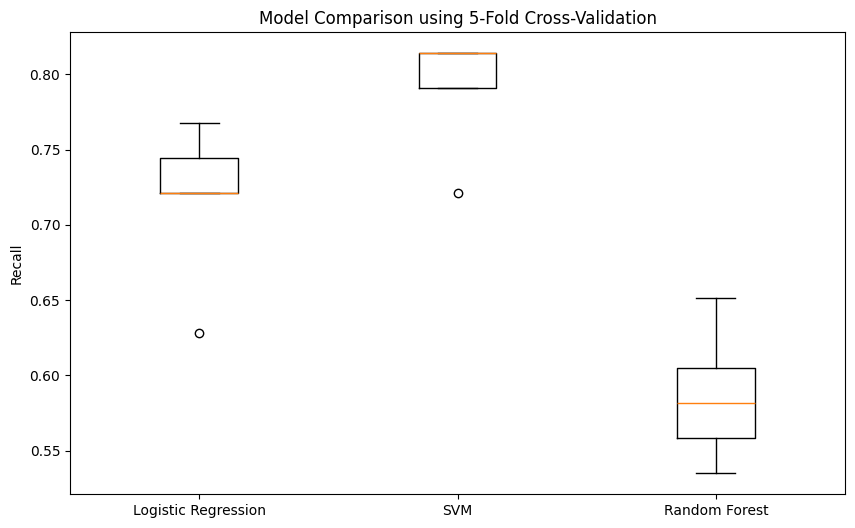

In [669]:
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison using 5-Fold Cross-Validation')
plt.ylabel('Recall')
plt.show()

In [670]:
grid = {
    'C':[0.05,0.06,0.09,0.1,0.3,0.5,0.7,1],
    'kernel':['rbf','poly','linear','sigmoid'],
}

In [671]:
SVM = SVC()
grid_search = GridSearchCV(estimator=SVM, param_grid=grid,
                           cv=5, scoring='recall')

In [672]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.05, 0.06, 0.09, 0.1, 0.3, 0.5, 0.7, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='recall')

In [673]:
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [674]:
model = grid_search.best_estimator_

In [675]:
model.fit(x_train,y_train)

SVC(C=1)

In [676]:
test = model.predict(x_test)

In [677]:
confusion_matrix(y_test,test)

array([[92, 10],
       [20, 33]])

In [678]:
recall_score(test,y_test)

0.7674418604651163

/tmp/ipython-input-1589935360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
/tmp/ipython-input-1589935360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test, color='b', label='Predicted Value',hist=False,ax=a

Text(0, 0.5, 'Count')

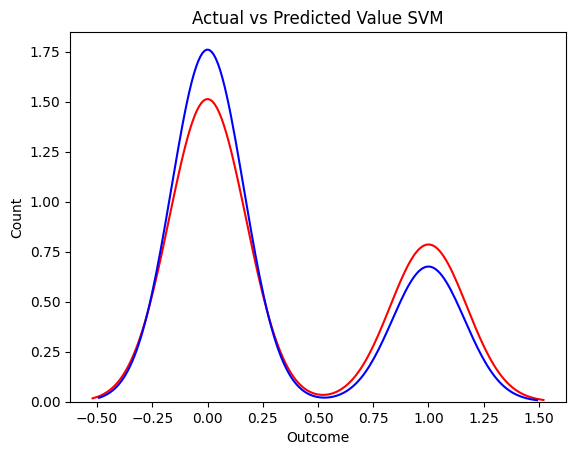

In [679]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(test, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value SVM')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [680]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       102
           1       0.77      0.62      0.69        53

    accuracy                           0.81       155
   macro avg       0.79      0.76      0.77       155
weighted avg       0.80      0.81      0.80       155



In [681]:
import joblib
joblib.dump(model,"model.pkl")

['model.pkl']

With an increase in Glucose level, insulin level, BMI, and number of pregnancies, the risk of diabetes increases. However, the number of pregnancies has a strange effect on the risk of diabetes, which the data couldn’t explain. The risk of diabetes also increases with an increase in skin thickness.

Coming to the classification models, Logistic Regression outperformed Random Forest and SVM with 78% accuracy. The model’s accuracy can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 768 rows.

In [682]:
test

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1])

In [683]:
one = 0
zero = 0
for i in test:
  if i==1:
    one+=1
  else:
    zero+=1

In [684]:
one

43

In [685]:
zero

112

In [686]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']